**Customer Segmentation**

In [11]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [12]:
# Load datasets
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

In [13]:
# Preprocessing
customer_features = customers.copy()
transaction_summaries = transactions.groupby('CustomerID').agg({'TotalValue': 'sum', 'Quantity': 'sum'}).reset_index()
customer_features = customer_features.merge(transaction_summaries, on="CustomerID", how="left")
customer_features.fillna(0, inplace=True)

In [14]:
# Prepare features for clustering
cluster_features = customer_features[['TotalValue', 'Quantity']]
scaler = StandardScaler()
scaled_features = scaler.fit_transform(cluster_features)

In [21]:
# Perform clustering
kmeans = KMeans(n_clusters=5, random_state=42)  # Choosing 5 clusters
kmeans.fit(scaled_features)
labels = kmeans.labels_

In [22]:
# Add cluster labels to dataset
customer_features['Cluster'] = labels

In [23]:
# Calculate DB Index
db_index = davies_bouldin_score(scaled_features, labels)
print(f"Davies-Bouldin Index: {db_index}")

Davies-Bouldin Index: 0.7529350579420507


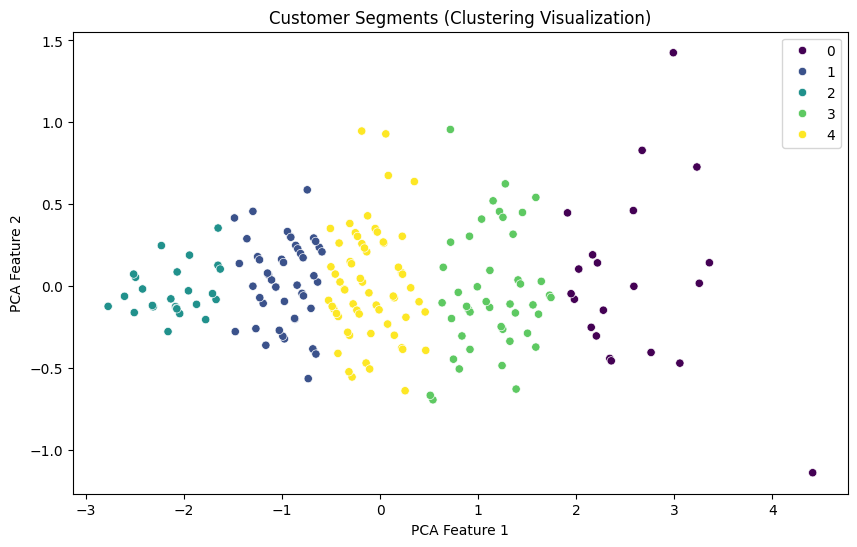

In [24]:
# Visualize clusters
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_features[:, 0], y=pca_features[:, 1], hue=labels, palette='viridis', legend="full")
plt.title("Customer Segments (Clustering Visualization)")
plt.xlabel("PCA Feature 1")
plt.ylabel("PCA Feature 2")
plt.show()